# DATA PREPARATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
 ##Download, load , visualise, normalise

In [3]:
X = pd.read_csv("Linear_X_Train.csv")
y = pd.read_csv("Linear_Y_Train.csv")

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_26148\3402035221.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


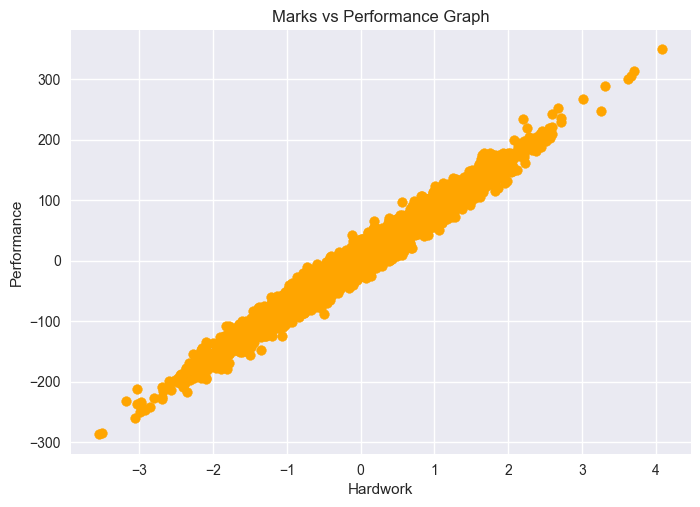

In [4]:
plt.style.use('seaborn')
plt.scatter(X,y, color = "orange")
plt.title("Marks vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [5]:
X = X.values
y = y.values

In [6]:
u = X.mean()
std = X.std()
X = (X - u)/ std

# Linear Regression

In [7]:
def hypothesis(x, theta):
    #theta = [theta0, theta1]
    
    y_ = theta[0] + theta[1]*x
    return y_

In [8]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range (0,m):
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += y_ - y
        grad[1] += (y_ - y)*X[i]
        
    return grad / m

In [9]:
def error(X,Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range (m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i]) ** 2
    return total_error / m

In [10]:
def gradientDescent(X,Y,max_steps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range (max_steps):
        #update theta
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1] 
        theta_list.append((theta[0],theta[1]))
    return theta, error_list, theta_list

In [11]:
theta,error_list, theta_list=gradientDescent(X,y)

In [12]:
print(error_list)

[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653]), array([191.87086897]), a

In [13]:
print(theta)

[ 0.6838508  79.90361453]


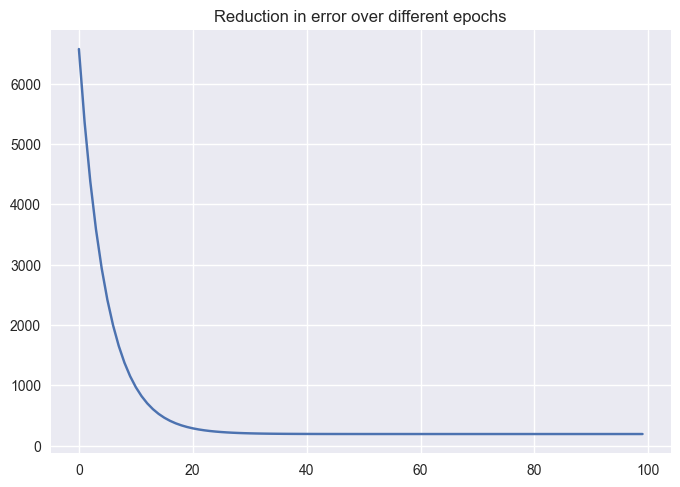

In [14]:
plt.plot(error_list)
plt.title("Reduction in error over different epochs")
plt.show()

# Predictions and Best Line

In [15]:
y_ = hypothesis(X,theta )
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


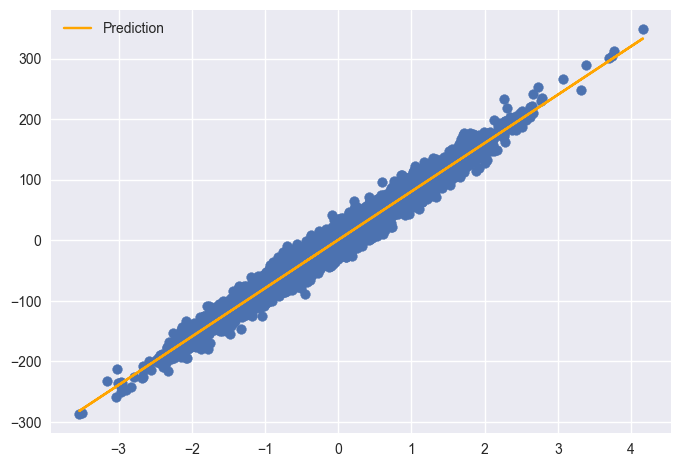

In [16]:
#Training + predictions
plt.scatter(X,y)
plt.plot(X,y_, color = "orange", label = 'Prediction')
plt.legend()
plt.show()

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


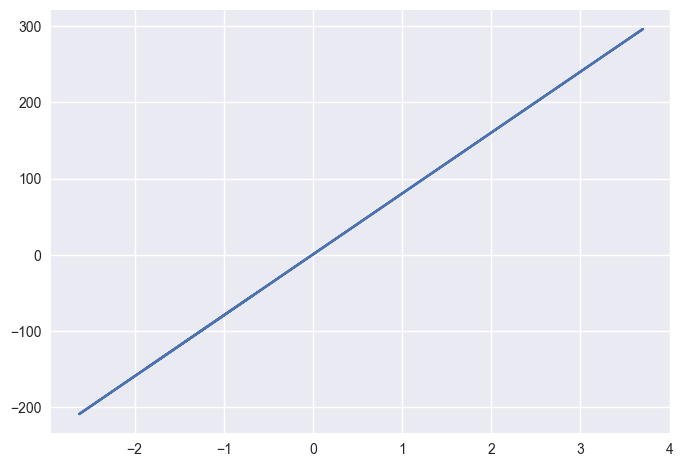

In [17]:
X_test = pd.read_csv('Linear_X_Test.csv').values
y_test = hypothesis(X_test, theta)
print(y_test)
# y_test.shape
plt.plot(X_test,y_test)

In [18]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [19]:
df.to_csv('y_prediction.csv', index = False)

# R2 Score

In [20]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1-(num/denom))
    return score * 100

In [21]:
r2_score(y,y_)

97.09612226971643

# Visualising Loss Function, Gradient Descent, Theta Updates 

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [23]:
theta = np.array(theta)
T0 = np.arange(-40,10,1)
T1 = np.arange(40,120,1)

In [24]:
T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
m = X.shape[0]

In [25]:
for i in range (J.shape[0]):
    for j in range (J.shape[1]):
        y_ = T0[i,j] + T1[i,j]*X
        J[i,j] = np.sum((y-y_)**2)/m

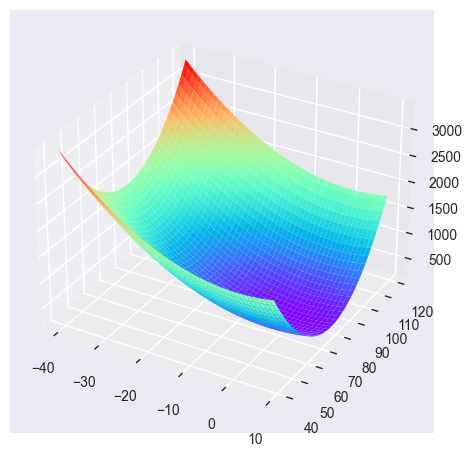

In [26]:
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow')
plt.show()

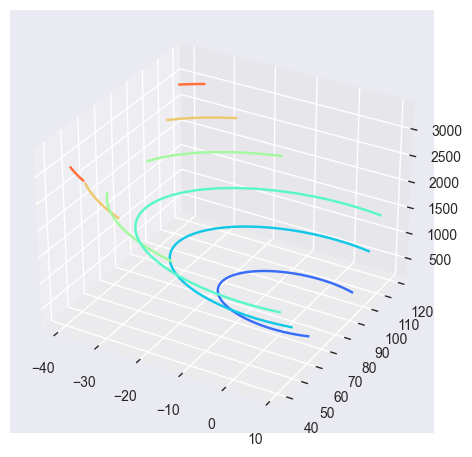

In [27]:
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.contour(T0, T1, J, cmap = 'rainbow')
plt.show()

In [28]:
theta_list = np.array(theta_list)

# Plot changes in value of theta

In [29]:
theta_list

array([[6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.29319173e-01, 7.35319405e+01],
       [6.347741

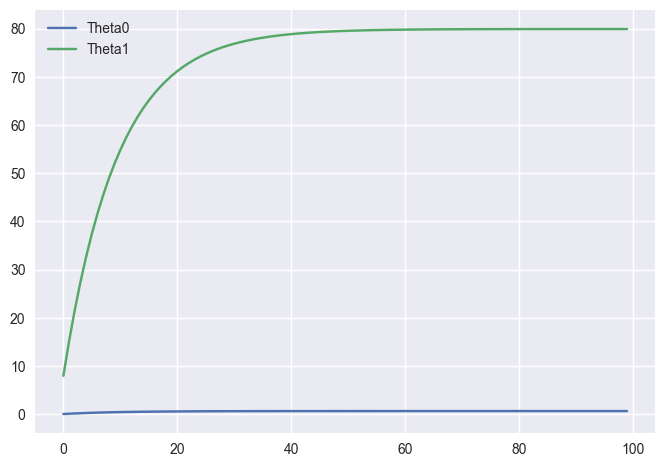

In [31]:
plt.plot(theta_list[:,0], label = "Theta0")
plt.plot(theta_list[:,1], label = "Theta1")
plt.legend()
plt.show()

# Trajectory traced by theta updates in Loss Function

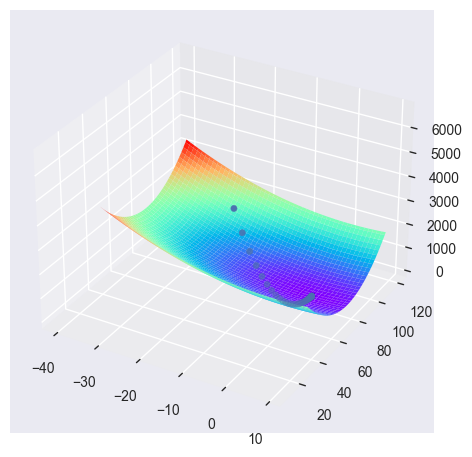

In [32]:
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.plot_surface(T0,T1, J, cmap = "rainbow")
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

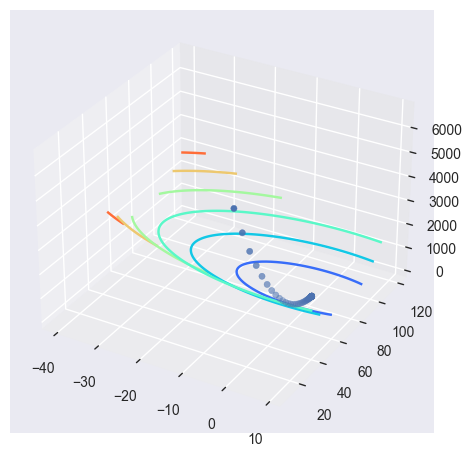

In [34]:
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.contour(T0,T1, J, cmap = "rainbow")
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

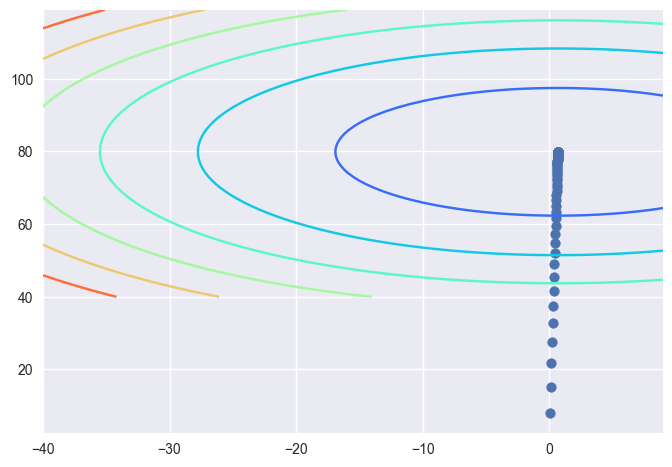

In [35]:
#2D contour plot or top view
plt.contour(T0,T1,J,cmap = "rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()